In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
%matplotlib inline

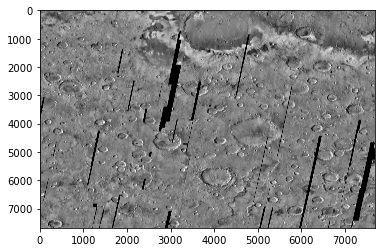

In [3]:
im = np.array(imageio.imread("./assets/thm_dir_N-30_000.png")).astype(np.uint8)
plt.imshow(im, cmap='gray', aspect='auto')

# Observation of Mars Images
- As seen from the image above, these satellite images of mars have black lines with no image data, as well as lots of salt and pepper noise. We will apply various filters in order to try and remove this.

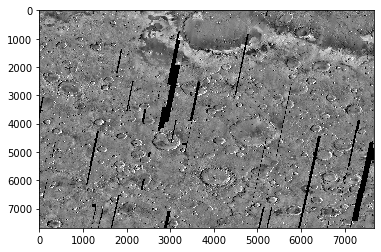

In [32]:
kernel = np.ones((5,5),np.float32)/25
median = cv2.medianBlur(im,5)
plt.imshow(median, cmap = 'gray', aspect='auto')

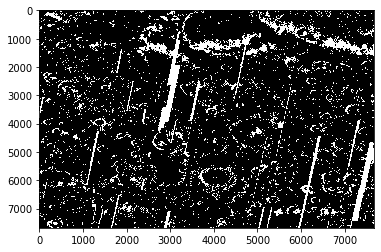

In [33]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,8))
ret,thresh_img = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img, cmap = 'gray', aspect='auto')

In [30]:
median = cv2.medianBlur(morph_img,5)

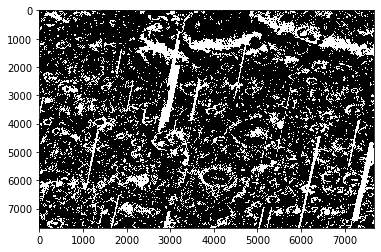

In [31]:
plt.imshow(median, cmap = 'gray', aspect='auto')

In [5]:
from pycda import CDA, load_image

cda = CDA()
image = load_image("./assets/thm_dir_N-30_000.png")
detections = cda.predict(image)

E:\Program Files (x86)\Conda\lib\site-packages\pycda\extractors.py:46: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  labels = measure.label(filtered, neighbors=4, background=0)


In [6]:
detections

,lat,long,diameter
0,16.0,19.0,39.750349
1,14.0,1751.0,35.323855
2,18.0,1804.0,40.949438
3,8.0,2372.0,18.541162
5,5.0,4901.0,12.514330
...,...,...,...
17181,7673.0,7565.0,10.092530
17183,7674.0,3064.0,9.706685
17184,7674.0,5801.0,8.740387
17185,7675.0,6116.0,7.046726


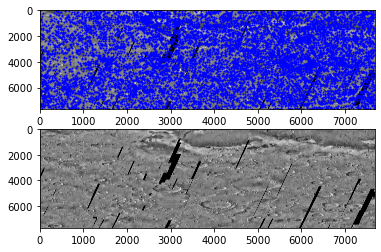

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(im, cmap='gray', aspect='auto')
ax[0].plot(detections['lat'],detections['long'], 'bo', markersize=1)
ax[1].imshow(im, cmap='gray', aspect='auto')

https://github.com/ramp-kits/mars_craters